In [ ]:
!pip install yfinance
!pip install tensorflow
#!pip install config

In [78]:
import numpy as np
import pandas as pd

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [25]:
!wget https://github.com/Aleks4ndr/hse_mds_thesis/raw/bac7e0e9de51d29ee41a07ff9ca38ba3008c6f84/nasdaq_2021.pickle

--2023-01-08 19:24:32--  https://github.com/Aleks4ndr/hse_mds_thesis/raw/bac7e0e9de51d29ee41a07ff9ca38ba3008c6f84/nasdaq_2021.pickle
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Aleks4ndr/hse_mds_thesis/bac7e0e9de51d29ee41a07ff9ca38ba3008c6f84/nasdaq_2021.pickle [following]
--2023-01-08 19:24:33--  https://raw.githubusercontent.com/Aleks4ndr/hse_mds_thesis/bac7e0e9de51d29ee41a07ff9ca38ba3008c6f84/nasdaq_2021.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12069128 (12M) [application/octet-stream]
Saving to: ‘nasdaq_2021.pickle’

nasdaq_2021.pickle  100%[===================>]  11.51M 

In [57]:
timeVAE_data = np.load('./timeVAE/datasets/sine_subsampled_train_perc_100.npz')

In [58]:
timeVAE_data['data'].shape

(10000, 24, 5)

In [9]:
!wget https://github.com/Aleks4ndr/hse_mds_thesis/raw/main/nasdaq_components.txt

--2023-01-08 18:53:36--  https://github.com/Aleks4ndr/hse_mds_thesis/raw/main/nasdaq_components.txt
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Aleks4ndr/hse_mds_thesis/main/nasdaq_components.txt [following]
--2023-01-08 18:53:37--  https://raw.githubusercontent.com/Aleks4ndr/hse_mds_thesis/main/nasdaq_components.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76627 (75K) [text/plain]
Saving to: ‘nasdaq_components.txt’

nasdaq_components.t 100%[===================>]  74.83K  --.-KB/s    in 0.02s   

2023-01-08 18:53:37 (4.55 MB/s) - ‘nasdaq_components.txt’ saved [76627/76627]



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import networkx as nx
import scipy
from sklearn.feature_selection import f_regression, mutual_info_regression
# from minepy import MINE

In [ ]:

!wget https://github.com/abudesai/timeVAE/archive/refs/heads/main.zip -O TimeVAE.zip
!unzip TimeVAE.zip
!mv timeVAE-main timeVAE

In [ ]:
# !rm -rf timeVAE
# !unzip TimeVAE.zip
# !mv timeVAE-main timeVAE

In [69]:
from os import chdir
chdir('timeVAE')
import vae_conv_I_model

In [76]:
TimeVAE = vae_conv_I_model.VariationalAutoencoderConvInterpretable

In [10]:
tickers = []
with open('nasdaq_components.txt', 'r') as file:
    i = 0
    for line in file:
        i += 1
        if i % 10 == 0:
            tickers.append(line)
        

In [27]:
#data = yf.download(" ".join(tickers), start="2021-12-31", end="2023-01-01")

[*********************100%***********************]  983 of 983 completed


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#data.to_pickle('/content/drive/MyDrive/hse_mds_thesis/nasdaq_2022.pickle')
data = pd.read_pickle('/content/drive/MyDrive/hse_mds_thesis/nasdaq_2022.pickle')

In [98]:
# data.to_json('nasdaq_2021.json')

In [32]:
data = data.reorder_levels([1,0], axis=1).sort_index(axis=1)

In [29]:
stocks_with_na = data.isna().sum()[data.isna().sum() > 0].index.get_level_values(1).unique().to_list()

In [43]:
data = data.drop(columns = stocks_with_na)

In [45]:
normalized_data = data / data.iloc[0] - 1

In [32]:
# AAL = yf.Ticker('AAL')

In [94]:
normalized_data_sw = normalized_data.swaplevel(0, 1, axis=1).sort_index(level=0, axis=1) #.dropna(axis=1)

In [51]:
normalized_data['AAL']

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-03,0.043987,0.043987,0.044662,0.015059,0.008854,1.071017
2022-01-04,0.059020,0.059020,0.059913,0.051311,0.063641,0.416788
2022-01-05,0.040089,0.040089,0.056100,0.032348,0.058661,0.667614
2022-01-06,0.033964,0.033964,0.038126,0.023424,0.045379,-0.075485
...,...,...,...,...,...,...
2022-12-23,-0.292316,-0.292316,-0.307734,-0.312326,-0.307692,-0.168263
2022-12-27,-0.302339,-0.302339,-0.303377,-0.308422,-0.301605,-0.086111
2022-12-28,-0.314031,-0.314031,-0.309368,-0.316788,-0.307139,-0.009033


In [56]:
prepared_data = normalized_data.values.T.reshape(int(5826/6), 6, 252)
prepared_data[0]

array([[ 0.        ,  0.04398669,  0.05902012, ..., -0.31403116,
        -0.29287303, -0.29175941],
       [ 0.        ,  0.04398669,  0.05902012, ..., -0.31403116,
        -0.29287303, -0.29175941],
       [ 0.        ,  0.04466229,  0.05991277, ..., -0.3093682 ,
        -0.30773423, -0.30119828],
       [ 0.        ,  0.01505859,  0.05131066, ..., -0.31678752,
        -0.31399889, -0.30117125],
       [ 0.        ,  0.00885445,  0.06364137, ..., -0.30713887,
        -0.31433312, -0.30547867],
       [ 0.        ,  1.07101709,  0.4167885 , ..., -0.00903326,
        -0.04602314, -0.08136709]])

In [58]:
prepared_data = np.swapaxes(prepared_data, 1,2)
prepared_data.shape

(971, 252, 6)

In [71]:
N, T, D = prepared_data.shape

In [72]:
perc_of_train_used = 100     # 5, 10, 20, 100    
valid_perc = 0.1

In [73]:
full_train_data = prepared_data

In [74]:
N_train = int(N * (1 - valid_perc))
N_valid = N - N_train
# Shuffle data
# np.random.shuffle(full_train_data)

train_data = full_train_data[:N_train]
valid_data = full_train_data[N_train:]   
print("train/valid shapes: ", train_data.shape, valid_data.shape)

train/valid shapes:  (873, 252, 6) (98, 252, 6)


In [80]:
latent_dim = 8

In [83]:
vae = TimeVAE(seq_len=T,  feat_dim = D, latent_dim = latent_dim, hidden_layer_sizes=[10, 10, 10], #hidden_layer_sizes=[50, 100, 200],        #[80, 200, 250] 
              reconstruction_wt = 3.0,
              # ---------------------
              # disable following three arguments to use the model as TimeVAE_Base. Enabling will convert to Interpretable version.
              # Also set use_residual_conn= False if you want to only have interpretable components, and no residual (non-interpretable) component. 
              
              # trend_poly=2, 
              # custom_seas = [ (6,1), (7, 1), (8,1), (9,1)] ,     # list of tuples of (num_of_seasons, len_per_season)
              # use_scaler = True,
              
              #---------------------------
              use_residual_conn = True
)   

In [84]:
vae.compile(optimizer=Adam())
# vae.summary() ; sys.exit()

early_stop_loss = 'loss'
early_stop_callback = EarlyStopping(monitor=early_stop_loss, min_delta = 1e-1, patience=10) 
reduceLR = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5)

vae.fit(
    train_data, 
    batch_size = 32,
    epochs=500,
    shuffle = True,
    callbacks=[early_stop_callback, reduceLR],
    verbose = 1
)

Epoch 1/500
28/28 [==============================] - 3s 36ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 0.0010
Epoch 2/500
28/28 [==============================] - 1s 35ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 0.0010
Epoch 3/500
28/28 [==============================] - 1s 37ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 0.0010
Epoch 4/500
28/28 [==============================] - 1s 35ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 0.0010
Epoch 5/500
28/28 [==============================] - 1s 35ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 0.0010
Epoch 6/500
28/28 [==============================] - 1s 35ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 1.0000e-04
Epoch 7/500
28/28 [==============================] - 1s 35ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan - lr: 1.0000e-04
Epoch 8/500
28/28 [==============================] - 1s 36ms/

In [ ]:
dist_corr = scipy.spatial.distance.correlation
cos_dist = scipy.spatial.distance.cosine
def mutual_info_corr(X, y):
    mi = mutual_info_regression(X.reshape(-1,1), y.reshape(-1,1))
    return mi_reg / np.max(mi_reg)

def mic_corr(X, y):
    mine = MINE(alpha=0.6, c=15, est='mic_approx')
    mine.compute_score(X,y)
    return mine.mic() 

In [12]:
close2021 = data['Adj Close'].dropna(axis=1)

In [16]:
tickers_list = close2021.columns.to_list()

In [ ]:
def get_graph(corr, treshold):

 
    # Transform it in a links data frame (3 columns only):
    links = corr.stack().reset_index()
    links.columns = ['var1', 'var2', 'value']

    # Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
    links_filtered=links.loc[links['value'] >= treshold]

    # Build your graph
    G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

In [ ]:
def count_components(G):
    # connected_nodes = len(G.nodes)
    # for component in nx.connected_components(G):
    #     connected_nodes -= len(component)
    
    return len(list(nx.connected_components(G)))

def treshold_components(data, correlation_method, title):
    
    #corr_mat = data.corr(correlation_method)
    corr_by_month = close2021.groupby(lambda x: x.month).corr(correlation_method)
    corr_mat = corr_by_month.groupby(lambda x: x[1]).mean()
    Y = []
    X = np.linspace(0, 1, 101)
    for treshold in X:
        G = get_graph(corr_mat, treshold)
        Y.append(count_components(G))
        
    plt.plot(X, Y, label = 'Connected componets')
    plt.xlabel('Treshold')
    plt.ylabel('Connected components')
    plt.title(title)
    

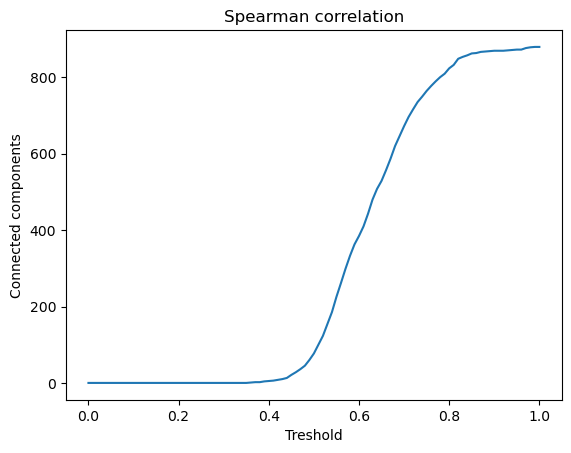

In [ ]:
treshold_components(close2021, 'spearman', 'Spearman correlation')

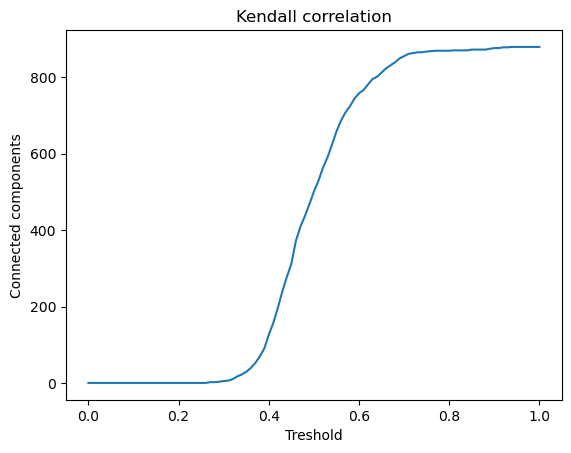

In [ ]:
treshold_components(close2021, 'kendall', 'Kendall correlation')

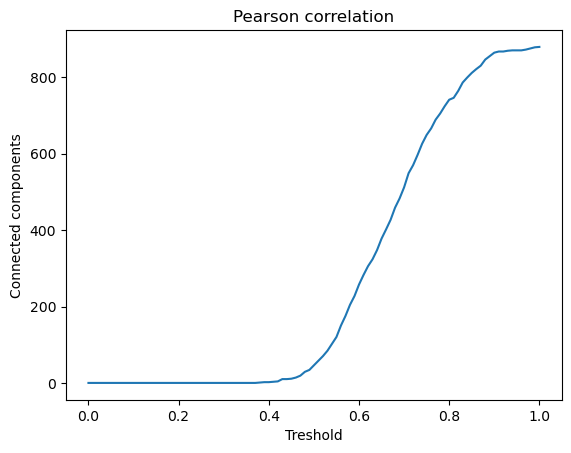

In [ ]:
treshold_components(close2021, 'pearson', 'Pearson correlation')

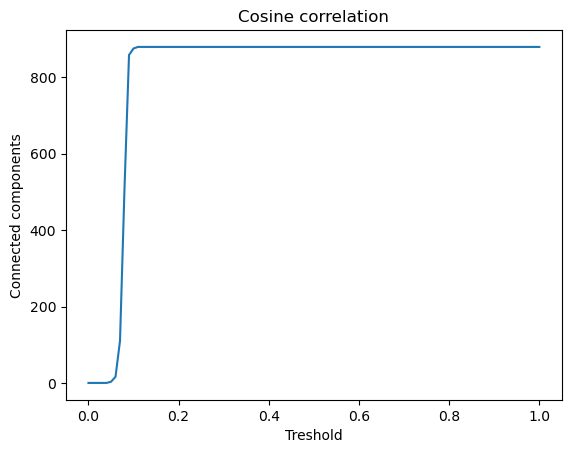

In [ ]:
treshold_components(close2021, cos_dist, 'Cosine correlation')

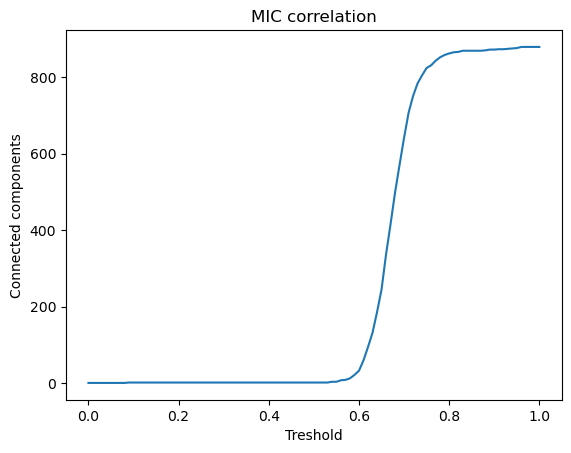

In [ ]:
treshold_components(close2021, mic_corr, 'MIC correlation')

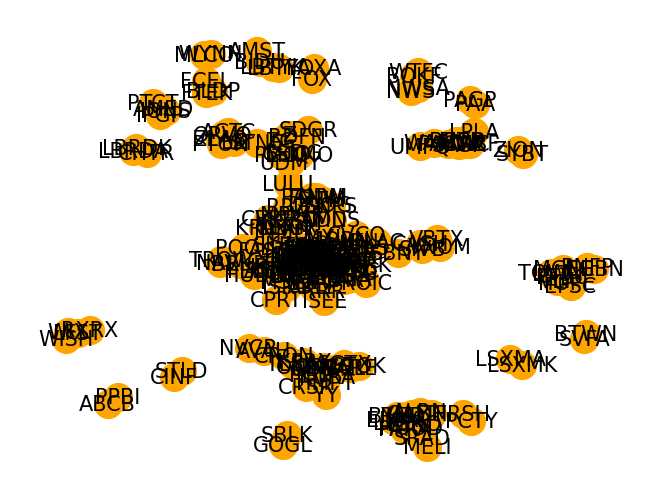

In [ ]:
nx.draw(graph_mat, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

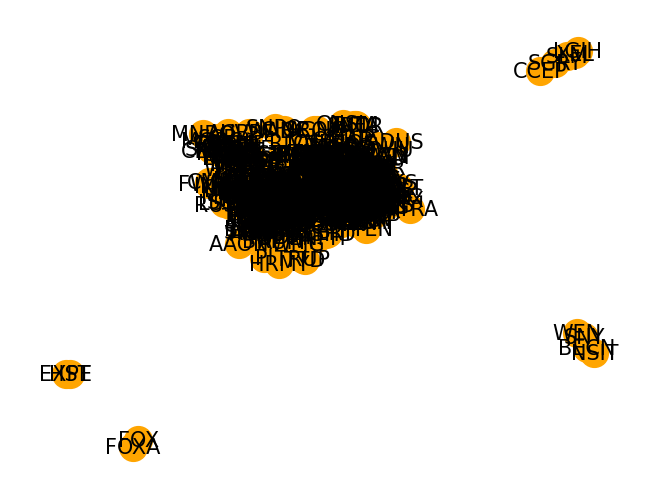

In [ ]:
G = get_graph(close2021.corr(method='spearman'), 0.85)
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)